# **Part 1: Microsoft Malware Detection (Supervised Learning)**

---

Here, I worked on the 'Microsoft Malware' dataset from Kaggle. as part of the Microsoft Malware Prediction competition. I tried to cover all the major concepts of supervised and unsupervised machine learning methods in this project.

The dataset used contains a set of machines, which run Microsoft Windows OS. My aim is to predict the probability of a Windows machine getting infected by various families of malware, based on different properties of that machine.

---

In [ ]:
# Suppressing Warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost as xgb

In [ ]:
# Loading the Dataset
df = pd.read_csv("Microsoft_malware_dataset_min.csv")
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [ ]:
# Exploring the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [ ]:
df.describe()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier
count,100000.000000,96585.000000,99815.000000,100000.000000,98924.000000,94068.000000,99609.000000,100000.000000
mean,0.499280,0.281607,0.006642,0.075850,0.977326,0.000351,0.944864,108.188050
std,0.500002,0.449785,0.081230,0.264759,0.148863,0.018727,0.228246,62.989406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,97.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,162.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,222.000000


In [ ]:
df.isnull().sum()

,0
HasDetections,0
Wdft_IsGamer,3415
Census_IsVirtualDevice,185
Census_OSEdition,0
Census_HasOpticalDiskDrive,0
Firewall,1076
SMode,5932
IsProtected,391
OsPlatformSubRelease,0
CountryIdentifier,0


In [ ]:
# Filling Missing Values
for col in ['Wdft_IsGamer', 'Census_IsVirtualDevice', 'Firewall', 'SMode', 'IsProtected', 'Census_OSEdition']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# Dropping Duplicates
print("Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate Rows: 83886


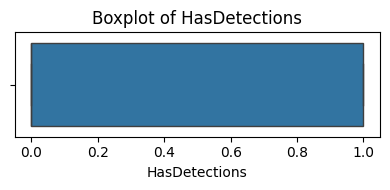

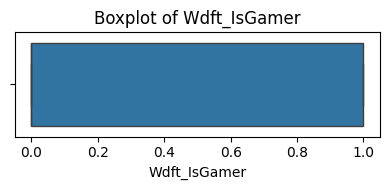

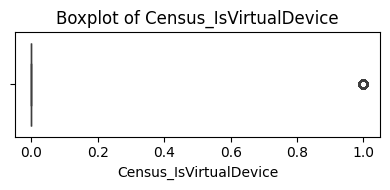

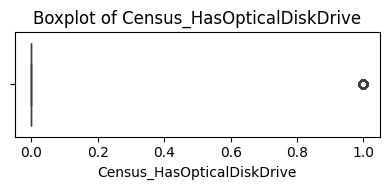

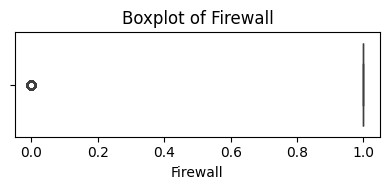

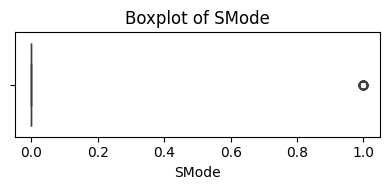

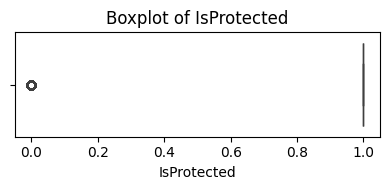

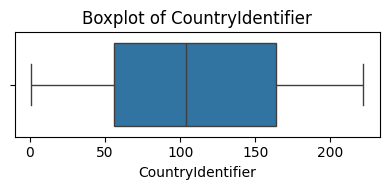

In [ ]:
# Handling Outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [ ]:
# Encoding Binary and Categorical Features
binary_cols = ['Wdft_IsGamer', 'Census_IsVirtualDevice', 'Firewall', 'SMode', 'IsProtected']
df[binary_cols] = df[binary_cols].astype(int)

In [ ]:
# Target Encoding for High-Cardinality Categoricals
df['Census_OSEdition_encoded'] = df['Census_OSEdition'].map(df.groupby('Census_OSEdition')['HasDetections'].mean())
df['OsPlatformSubRelease_encoded'] = df['OsPlatformSubRelease'].map(df.groupby('OsPlatformSubRelease')['HasDetections'].mean())

In [ ]:
# Feature Selection
X = df.drop(columns=["HasDetections", "OsPlatformSubRelease", "Census_OSEdition", "CountryIdentifier", 'Wdft_IsGamer',
                     'Census_HasOpticalDiskDrive', 'Firewall', 'SMode'])
y = df["HasDetections"]

In [ ]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

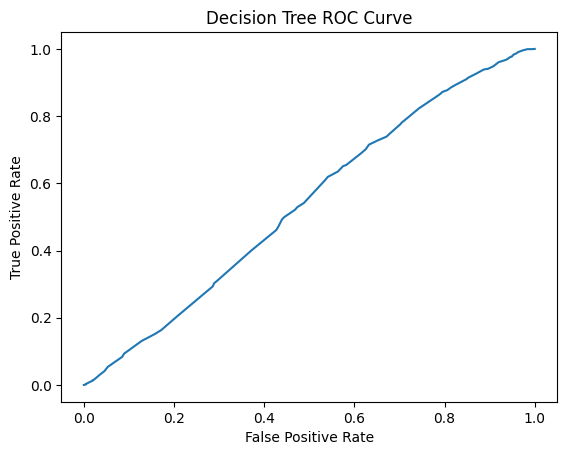

Decision Tree ROC AUC Score: 0.5382181464460356


In [ ]:
# Base Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_dt)
plt.plot(fpr, tpr)
plt.title('Decision Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Decision Tree ROC AUC Score:', roc_auc_score(y_test, y_pred_proba_dt))

In [ ]:
# Decision Tree Grid Search
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': [None, 'balanced']
}
grid_dt = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
y_pred_proba_dt_best = best_dt.predict_proba(X_test)[:, 1]
print("Best Decision Tree Params:", grid_dt.best_params_)
print("Tuned Decision Tree ROC AUC:", roc_auc_score(y_test, y_pred_proba_dt_best))

Best Decision Tree Params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Decision Tree ROC AUC: 0.536252348579545


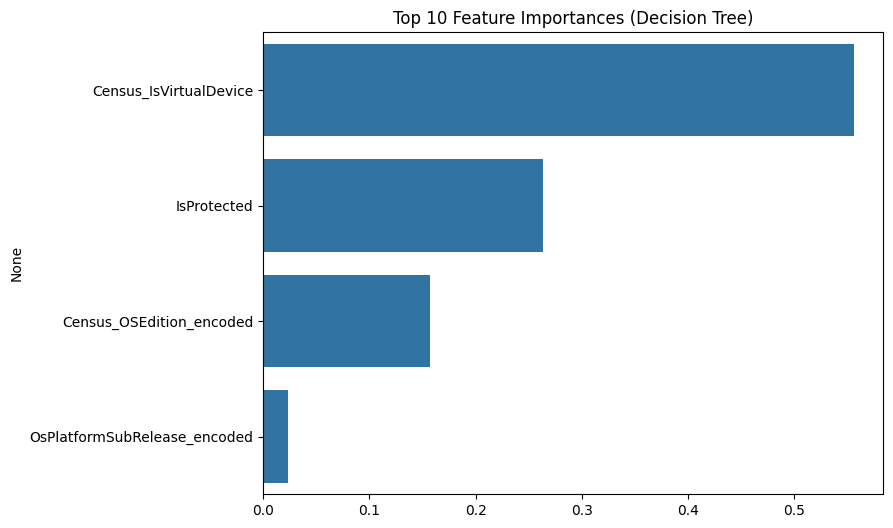

In [ ]:
# Feature Importance Plot
importances = best_dt.feature_importances_
feat_names = X.columns
sorted_idx = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(8, 6))
sns.barplot(x=importances[sorted_idx], y=feat_names[sorted_idx])
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.show()

In [ ]:
# Random Forest + Randomized Search with Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import RandomizedSearchCV

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
selected_features = X.columns[selector.get_support()]
print("Top Selected Features:", selected_features.tolist())

Top Selected Features: ['Census_IsVirtualDevice', 'IsProtected', 'Census_OSEdition_encoded', 'OsPlatformSubRelease_encoded']


In [ ]:
# Randomized Search Parameters
rf_param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rand_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_dist, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
rand_rf.fit(X_train_selected, y_train)
best_rf = rand_rf.best_estimator_
y_pred_proba_rf = best_rf.predict_proba(X_test_selected)[:, 1]
print("Best Random Forest Params:", rand_rf.best_params_)
print("Tuned Random Forest ROC AUC:", roc_auc_score(y_test, y_pred_proba_rf))

Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5}
Tuned Random Forest ROC AUC: 0.5470432293530234


In [ ]:
# XGBoost + Randomized Search with Feature Selection
# Apply SelectKBest to XGBoost input too
X_train_selected_xgb = selector.fit_transform(X_train, y_train)
X_test_selected_xgb = selector.transform(X_test)

xgb_param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

rand_xgb = RandomizedSearchCV(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc'),
                               param_distributions=xgb_param_dist,
                               n_iter=15, cv=5, scoring='roc_auc', random_state=42)

rand_xgb.fit(X_train_selected_xgb, y_train)
best_xgb = rand_xgb.best_estimator_
y_pred_proba_xgb = best_xgb.predict_proba(X_test_selected_xgb)[:, 1]
print("Best XGBoost Params:", rand_xgb.best_params_)
print("Tuned XGBoost ROC AUC:", roc_auc_score(y_test, y_pred_proba_xgb))

Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Tuned XGBoost ROC AUC: 0.5484872282191997


## **Model Performance (ROC AUC Scores)**

- Decision Tree = 0.538

  Decision Tree (tuned) = 0.536

- Random Forest (tuned) = 0.547

- XGBoost (tuned) = 0.548 (best, though slightly)


**Interpretation:**

All models slightly outperformed random guessing (**0.50 baseline**). XGBoost achieved the best result, though still not good enough.


### **Insights & Observations:**

- Feature signal is weak, likely due to data sparsity or abstraction in the min.csv version.

- XGBoost handled weak predictors better than Decision Trees and Random Forests.

- Key feature signals were related to system protection and OS variations.

### **Possible recommendations for Improvement of models:**

- Perform leakage-free target encoding on the train-set only.

- Try using advanced models like LightGBM or CatBoost.

- Stronger features can be engineered(e.g., protection ratio, patch status, update frequency).

**Conclusion:**

This baseline exercise highlights the modeling challenges of sparse system datasets and showcases the value of feature selection and ensemble methods. Future gains lie in enriching features and carefully managing data leakage and class imbalance.

---

# **Part 2: Microsoft Malware Clustering (Unsupervised Learning)**

---

Here, I dropped the target variable and other irrelevant features, determined the optimal K-parameter, and applied K-means clustering before plotting the clusters and interpreting the visuals.

---

In [ ]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Preparing Data (dropping label and irrelevant features)
X_unsupervised = df.drop(columns=["HasDetections", "OsPlatformSubRelease", "Census_OSEdition", "CountryIdentifier",
                                  'Wdft_IsGamer', 'Census_HasOpticalDiskDrive', 'Firewall', 'SMode'])

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)

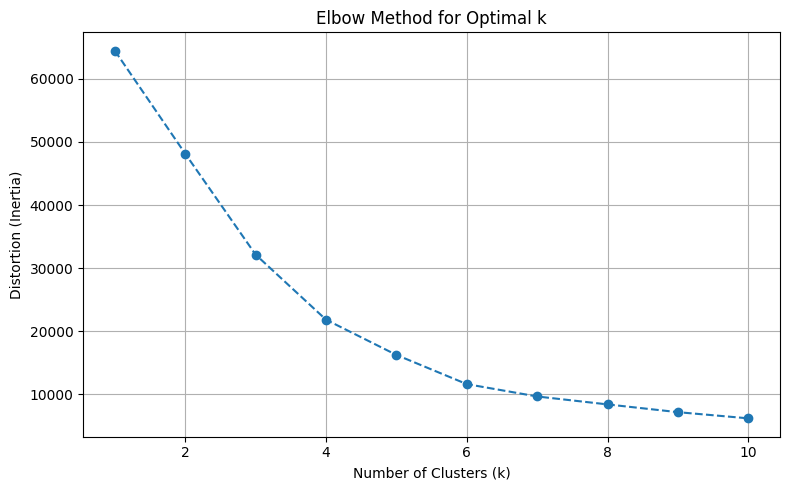

In [ ]:
# Elbow Method to Determine Optimal k
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(X_scaled)
    distortions.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), distortions, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Fit KMeans with Chosen k
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

# 3D Visualization with Plotly
fig = px.scatter_3d(
    df,
    x='Census_IsVirtualDevice',
    y='IsProtected',
    z='Census_OSEdition_encoded',
    color='Cluster',
    labels={
        'Census_IsVirtualDevice': 'Census Is Virtual Device',
        'IsProtected': 'Is Protected',
        'Census_OSEdition_encoded': 'Census OS Edition Encoded'
    },
    width=800,
    height=600,
    title='3D Scatter Plot of Clusters by Device Features'
)

fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

fig.update_layout(
    scene=dict(
        xaxis_title='Census Is Virtual Device',
        yaxis_title='Is Protected',
        zaxis_title='Census OS Edition Encoded'
    )
)

fig.show()

**Axes:**

- **Census_IsVirtualDevice**: Indicates if the device is virtual.

- **IsProtected**: Indicates if the device has protection enabled (e.g., antivirus).

- **Census_OSEdition_encoded**: Encoded version of the OS Edition feature.

Clusters are color-coded by the Cluster label assigned by KMeans.

### **Interpretation:**
- Devices tend to cluster distinctly across combinations of protection status and virtualization.

- Some clusters are entirely composed of IsProtected=1 or IsVirtualDevice=0, indicating:
  
  Cluster 0 (dark): May consist mostly of physical, protected devices.

  Cluster 3 or 4: Might represent virtual machines or unprotected systems.

- Vertical separation along the Census_OSEdition_encoded axis hints at OS-level differences playing a role in clustering.

### **Insight:**
Security status (IsProtected) and system type (IsVirtualDevice) are likely strong indicators of cluster membership, which might relate to vulnerability or malware risk profiles.

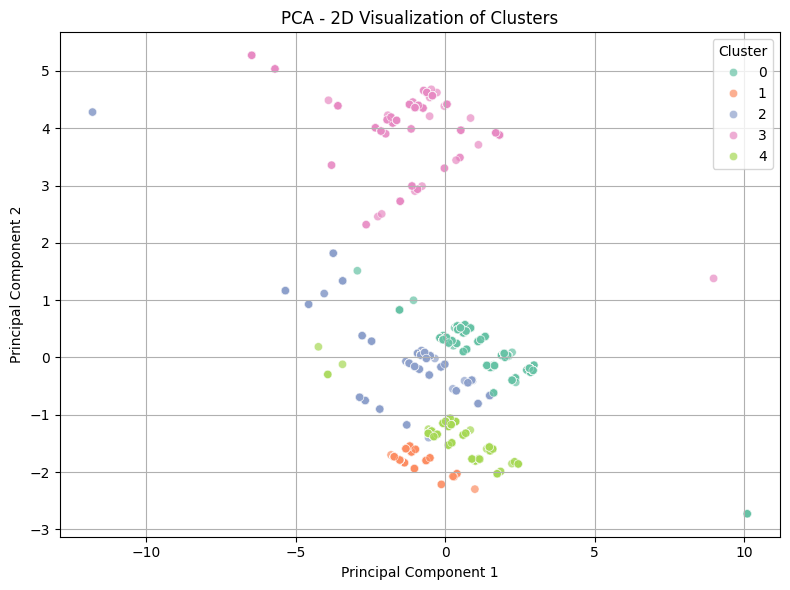

In [ ]:
# PCA 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('PCA - 2D Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

This PCA projection reduces the high-dimensional X_scaled feature space to 2D for easier visual clustering analysis.

### **Axes:**

**Principal Component 1** and **Principal Component 2** are both linear combinations of the original features capturing the most variance.

Clusters are distinct color-coded clusters (0 through 4) show non-random structure in the data.

### **Interpretation:**
- Clear separation between clusters means KMeans is effectively grouping devices based on their similarity in feature space.

- Cluster 3 (pink) is very well-separated, likely representing a unique group of devices—possibly a specific configuration like corporate VMs or very outdated OS types.

- Cluster overlap between 0 and 2 or 1 and 4, indicates some devices share similar attributes but diverge slightly on one or two features.

### **Insight:**
The choice of k=5 was justified since each cluster has distinguishable characteristics in the feature space.